In [3]:
from langgraph.graph import StateGraph, START, END
from typing import Dict , List, TypedDict
import warnings
import random

warnings.filterwarnings("ignore", category=UserWarning, module="langchain_core")


In [4]:
class AgentState(TypedDict):
    name:str
    number: List[int]
    counter: int
    

In [5]:
def greeting_node(state: AgentState) -> AgentState:
    """Greeting node wihc says hi to the person"""
    state["name"] = f"Hi there, {state["name"]}"
    state["counter"] = 0
    return state
def random_node(state: AgentState) -> AgentState:
    """Generates a ranom number form 0 to 10"""
    state["number"].append(random.randint(0, 10))
    state["counter"] += 1
    return state
def should_continue(state: AgentState) -> AgentState:
    """Function to decide what to do next"""
    if state["counter"] < 5:
        print("Entering LOOP", state["counter"])
        return "loop" #Continue Looping
    else:
        return "exist" # Exit the loop 

In [10]:
graph = StateGraph(AgentState)
graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge(START, "greeting")
graph.add_edge("greeting", "random")
graph.add_conditional_edges(
    "random", #source
    should_continue, #Action
    {
        "loop": "random",
        "exist": END
    }
)
app = graph.compile()


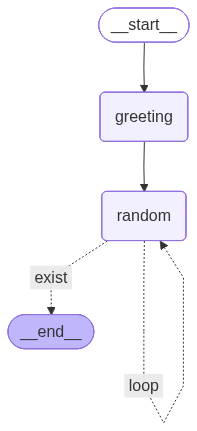

In [12]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [34]:
app.invoke({"name": "Vai", "number": [], "counter": -2})

Entering LOOP 1
Entering LOOP 2
Entering LOOP 3
Entering LOOP 4


{'name': 'Hi there, Vai', 'number': [9, 0, 1, 3, 0], 'counter': 5}